In [1]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

#reading in file for modelling
df = pd.read_excel('/content/Large_DataFrame_HitNonHit.xls')
df.head()

,Song_Name,Artists,Release_Date,Song_ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Hit_Song
0,Please Don't Go,KC And The Sunshine Band,1980-01-05,6dw6BquK0Mv72p6HpusqKN,0.482,0.615,6,-11.093,1,0.0398,0.00888,0.000002,0.0431,0.437,96.307,230533,1
1,Escape (The Pina Colada Song),Rupert Holmes,1980-01-05,5IMtdHjJ1OtkxbGe4zfUxQ,0.836,0.509,0,-13.668,1,0.0548,0.46700,0.000004,0.0436,0.949,138.714,276493,1
2,Rock With You,Michael Jackson,1980-01-05,7oOOI85fVQvVnK5ynNMdW7,0.808,0.535,1,-12.521,1,0.0353,0.17900,0.000099,0.1580,0.848,114.031,220627,1
3,Send One Your Love,Stevie Wonder,1980-01-05,3GcHkmz4horYIEPYvdB0xF,0.624,0.358,0,-17.456,0,0.0814,0.71500,0.000013,0.0862,0.418,72.841,242333,1
4,Do That To Me One More Time,Captain & Tennille,1980-01-05,0m4jVVZrsv0bLkAr1uM6UG,0.728,0.524,7,-8.227,1,0.0255,0.56300,0.000131,0.0913,0.510,90.262,256667,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25241 entries, 0 to 25240
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song_Name         25241 non-null  object 
 1   Artists           25241 non-null  object 
 2   Release_Date      25241 non-null  object 
 3   Song_ID           25241 non-null  object 
 4   danceability      25241 non-null  float64
 5   energy            25241 non-null  float64
 6   key               25241 non-null  int64  
 7   loudness          25241 non-null  float64
 8   mode              25241 non-null  int64  
 9   speechiness       25241 non-null  float64
 10  acousticness      25241 non-null  float64
 11  instrumentalness  25241 non-null  float64
 12  liveness          25241 non-null  float64
 13  valence           25241 non-null  float64
 14  tempo             25241 non-null  float64
 15  duration_ms       25241 non-null  int64  
 16  Hit_Song          25241 non-null  int64 

In [3]:
#Hit_Song needs to be changed to an object type
df = df.astype({'Hit_Song': object})

In [4]:
#removing duplicates
df = df.drop_duplicates(subset=['Song_ID'])
df.shape

(25197, 17)

In [5]:
#Spotify_ID, the Artist, and the Song Name will not be used to predict whether we've a hit as the focus is on the audio features
df = df.drop(['Song_Name', 'Artists', 'Song_ID'], axis = 1)
df.head()

,Release_Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Hit_Song
0,1980-01-05,0.482,0.615,6,-11.093,1,0.0398,0.00888,0.000002,0.0431,0.437,96.307,230533,1
1,1980-01-05,0.836,0.509,0,-13.668,1,0.0548,0.46700,0.000004,0.0436,0.949,138.714,276493,1
2,1980-01-05,0.808,0.535,1,-12.521,1,0.0353,0.17900,0.000099,0.1580,0.848,114.031,220627,1
3,1980-01-05,0.624,0.358,0,-17.456,0,0.0814,0.71500,0.000013,0.0862,0.418,72.841,242333,1
4,1980-01-05,0.728,0.524,7,-8.227,1,0.0255,0.56300,0.000131,0.0913,0.510,90.262,256667,1


In [6]:
df = df.drop(['Release_Date'], axis = 1)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Hit_Song
0,0.482,0.615,6,-11.093,1,0.0398,0.00888,0.000002,0.0431,0.437,96.307,230533,1
1,0.836,0.509,0,-13.668,1,0.0548,0.46700,0.000004,0.0436,0.949,138.714,276493,1
2,0.808,0.535,1,-12.521,1,0.0353,0.17900,0.000099,0.1580,0.848,114.031,220627,1
3,0.624,0.358,0,-17.456,0,0.0814,0.71500,0.000013,0.0862,0.418,72.841,242333,1
4,0.728,0.524,7,-8.227,1,0.0255,0.56300,0.000131,0.0913,0.510,90.262,256667,1


In [ ]:
#checking for nulls in the columns
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
Hit_Song            0
dtype: int64

In [ ]:
# We can see that our data is close to being evenly distributed, but songs that were hits account for slightly more of the data
df.Hit_Song.describe()

count     25197
unique        2
top           0
freq      14979
Name: Hit_Song, dtype: int64

In [ ]:
# Checking number of HS vs NHS, we can see that there is an imbalance in the data
df.Hit_Song.value_counts()

0    14979
1    10218
Name: Hit_Song, dtype: int64

Shold be noted for when the modelling begins that there is an imbalance in the dataset.

In [7]:
num_cols = ['danceability','energy', 'key','loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
df[num_cols].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,25197.000000,25197.000000,25197.000000,25197.000000,25197.000000,25197.000000,25197.000000,25197.000000,25197.000000,25197.000000,25197.000000,2.519700e+04
mean,5.438859,5.465503,10.132992,-5.523117,5.584197,4.975527,5.251220,5.086647,5.090016,5.385450,123.447754,2.481645e+05
std,777.742620,777.742478,777.721135,777.836386,777.741821,777.745524,777.743863,777.744887,777.744814,777.742981,777.569569,1.159516e+05
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.027000e+03
25%,0.415000,0.363000,2.000000,-12.877000,0.000000,0.033600,0.029500,0.000000,0.092900,0.262000,96.037000,1.941200e+05
50%,0.555000,0.607000,5.000000,-8.729000,1.000000,0.042700,0.197000,0.000246,0.123000,0.488000,117.763000,2.336960e+05
75%,0.675000,0.796000,8.000000,-6.091000,1.000000,0.066500,0.690000,0.180000,0.235000,0.708000,136.091000,2.812000e+05
max,123456.000000,123456.000000,123456.000000,123456.000000,123456.000000,123456.000000,123456.000000,123456.000000,123456.000000,123456.000000,123456.000000,3.560373e+06


In [8]:
#After describing our numerical columns, we can see that they all have the same 'min', which is an error when the data was being processed
#All rows containing 123456 will be dropped from the dataframe
df.drop(df.loc[df['energy']==123456].index, inplace=True)

In [ ]:
df[num_cols].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,25196.000000,25196.000000,25196.000000,25196.000000,25196.000000,25196.000000,25196.000000,25196.000000,25196.000000,25196.000000,25196.000000,2.519600e+04
mean,0.539250,0.565895,5.233569,-10.423161,0.684593,0.075899,0.351603,0.187023,0.190393,0.485838,118.552828,2.481695e+05
std,0.185229,0.272863,3.551769,6.202302,0.464687,0.099328,0.357467,0.330335,0.166298,0.268812,29.779334,1.159513e+05
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.027000e+03
25%,0.415000,0.363000,2.000000,-12.877750,0.000000,0.033600,0.029500,0.000000,0.092900,0.262000,96.036500,1.941298e+05
50%,0.555000,0.607000,5.000000,-8.729500,1.000000,0.042700,0.197000,0.000246,0.123000,0.488000,117.759500,2.337015e+05
75%,0.675000,0.796000,8.000000,-6.091750,1.000000,0.066500,0.690000,0.179250,0.235000,0.708000,136.089500,2.812000e+05
max,0.988000,1.000000,11.000000,1.885000,1.000000,0.961000,0.996000,1.000000,0.999000,0.994000,229.700000,3.560373e+06


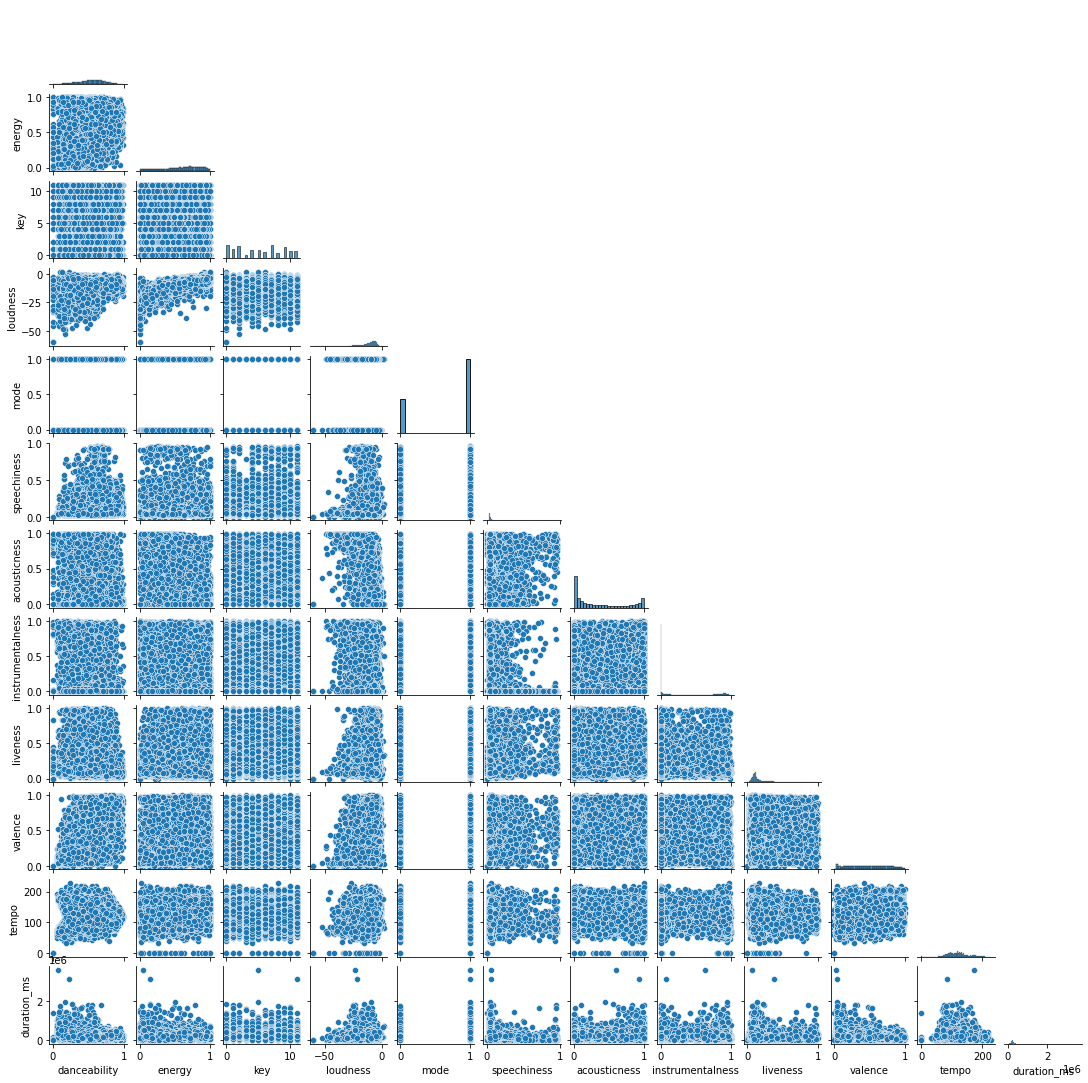

In [10]:
#checking distributions of our numerical values
import seaborn as sns
dist = sns.pairplot(df, x_vars = ['danceability','energy', 'key','loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'], 
                    y_vars=['danceability','energy', 'key','loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
                    corner = True)
dist.fig.set_size_inches(15,15)

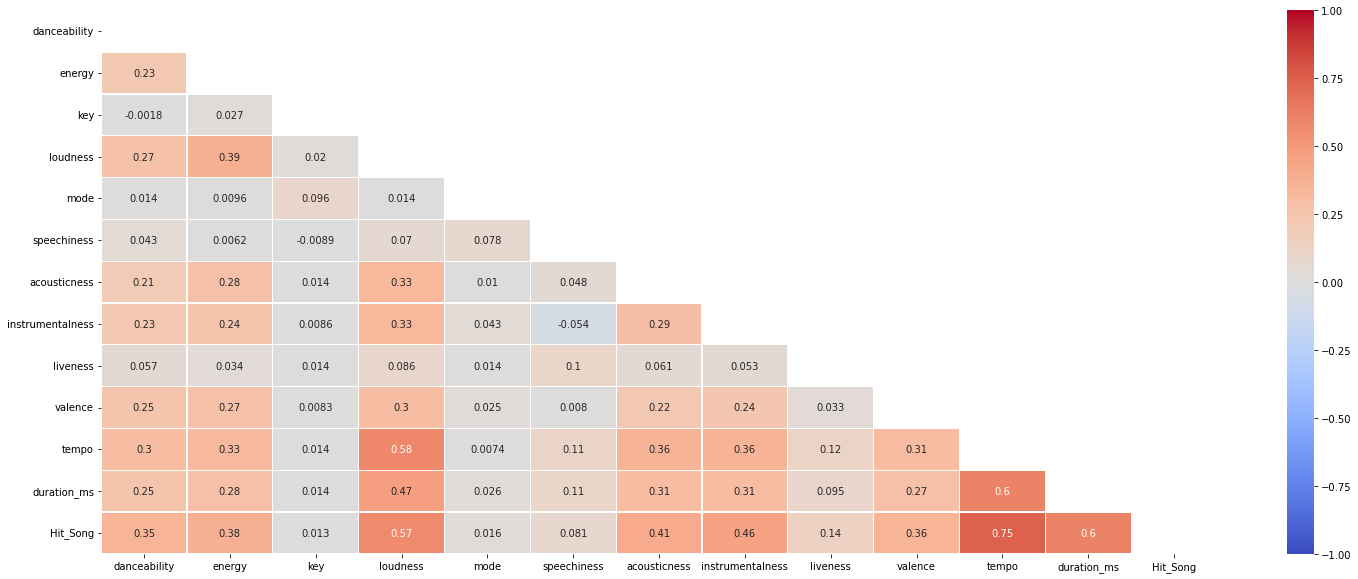

In [11]:
import matplotlib.pyplot as plt

# calculate the correlation matrix
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
#Doesn't seem to be much initial correlation between the variables
#Tempo and Loudness, Duration and Tempo, Duration and Loudness all showing some correlation

In [12]:
#Next step in prepping our data for modelling is scaling our data
#scaling the data allows for numerical features to be within the same range as others 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Hit_Song
0,-0.309082,0.179967,0.215793,-0.108001,0.678765,-0.363440,-0.958771,-0.566168,-0.885732,-0.181685,-0.747037,-0.152106,1
1,1.602105,-0.208514,-1.473540,-0.523177,0.678765,-0.212421,0.322826,-0.566161,-0.882726,1.723030,0.677032,0.244276,1
2,1.450938,-0.113226,-1.191984,-0.338242,0.678765,-0.408745,-0.482858,-0.565873,-0.194791,1.347295,-0.151848,-0.237540,1
3,0.457552,-0.761917,-1.473540,-1.133930,-1.473263,0.055384,1.016609,-0.566135,-0.626554,-0.252368,-1.535049,-0.050337,1
4,1.019031,-0.153540,0.497348,0.354095,0.678765,-0.507410,0.591387,-0.565776,-0.595886,0.089885,-0.950034,0.073287,1


In [13]:
#changing Hit_Song back to type int for the modelling
df = df.astype({'Hit_Song': int})

In [ ]:
df.shape

(25196, 13)

In [14]:
#assigning our target variable and predictors
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Hit_Song'])
y = df['Hit_Song'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 40, stratify=y)

In [15]:
#importing our models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics   
from sklearn.model_selection import GridSearchCV 
#importing our model evaluators
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score, auc

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

# Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
accuracy_log_tr = log_reg.score(X_train, y_train)
accuracy_log = log_reg.score(X_test,y_test)
print("Logistic Regression Accuracy on Training :",accuracy_log_tr)
print("Logistic Regression Accuracy on Testing :",accuracy_log)

Logistic Regression Accuracy on Training : 0.7717865850201281
Logistic Regression Accuracy on Testing : 0.7683556025929356


In [ ]:
#using classification report to check the accuracy of predictions
log_pred= log_reg.predict(X_test)
log_report = classification_report(y_test,log_pred)
print(log_report)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      4494
           1       0.69      0.77      0.73      3065

    accuracy                           0.77      7559
   macro avg       0.76      0.77      0.76      7559
weighted avg       0.77      0.77      0.77      7559



Interesting to note that our initial Logistic Regression Model seem to overall performed well. However, it seemed to struggle detecting songs that weren't hits more so than those that were, as we can see from the significantly lower precision & recall score for Class 1.

Text(0.5, 58.5, 'Predicted')

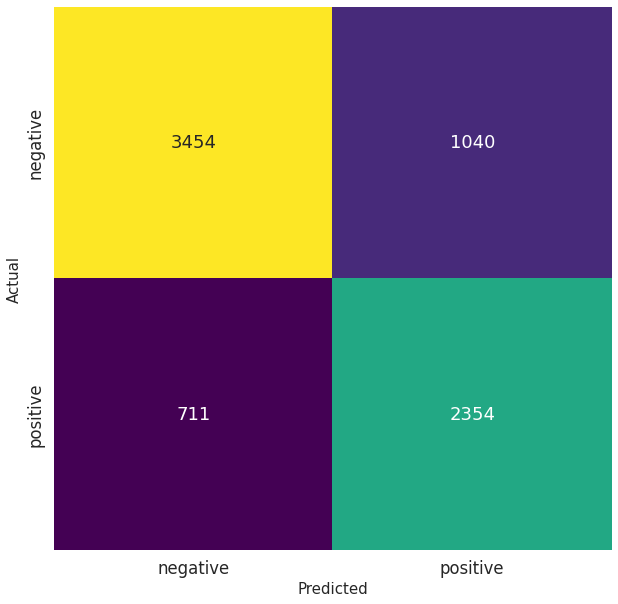

In [ ]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,log_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

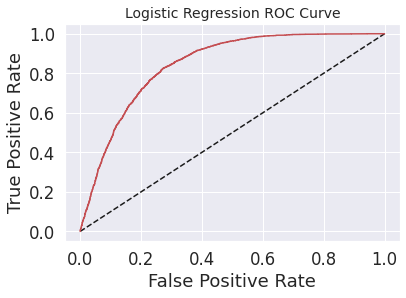

In [ ]:
log_pred_prob = log_reg.predict_proba(X_test)[:,1]
false_positive, true_positive, thresholds = roc_curve(y_test, log_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive, true_positive, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=14)
plt.show();

In [ ]:
model = LogisticRegression()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.772


# Support Vector Machines

In [ ]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
accuracy_svm_tr = svm.score(X_train, y_train)
accuracy_svm = svm.score(X_test,y_test)
print("Support Vector Machine Accuracy on Training :",accuracy_svm_tr)
print("Support Vector Machine Accuracy on Testing:",accuracy_svm)

Support Vector Machine Accuracy on Training : 0.8086976243125248
Support Vector Machine Accuracy on Testing: 0.7917713983331128


From our initial scoring accuracies, SVM performed better than our logistic regression model.

In [ ]:
svm_pred= svm.predict(X_test)
svm_report = classification_report(y_test,svm_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      4494
           1       0.71      0.83      0.76      3065

    accuracy                           0.79      7559
   macro avg       0.79      0.80      0.79      7559
weighted avg       0.80      0.79      0.79      7559



The SVM Classification Report is a significant improvement from our Logistic Regression Model, and it improved the recall score for our hit songs, from 0.77 to 0.83.

Text(0.5, 58.5, 'Predicted')

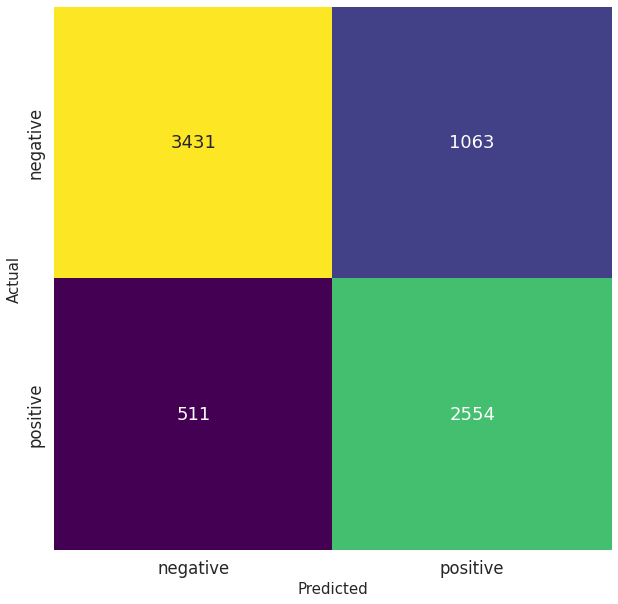

In [ ]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,svm_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

The Confusion Matrix shows an improvement in both detecting hit songs.

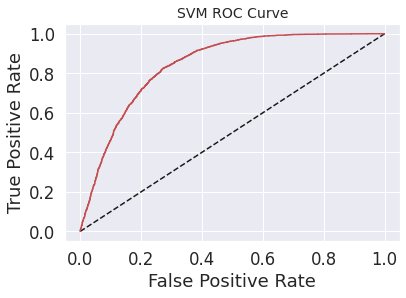

In [ ]:
svm_pred_prob = svm.predict_proba(X_test)[:,1]
false_positive, true_positive, thresholds = roc_curve(y_test, svm_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive, true_positive, label='SVM',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve',fontsize=14)
plt.show();

In [ ]:
model = SVC(probability=True)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Our Mean ROC AUC also increased from 0.772 to 0.796.

# Naives Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)
predict_nb_y = nb.predict(X_test)
accuracy_nb_tr = nb.score(X_train,y_train)
accuracy_nb = nb.score(X_test,y_test)
print("Naives Bayes accuracy on Training :",accuracy_nb_tr)
print("Naives Bayes accuracy on Testing :",accuracy_nb)

Naives Bayes accuracy on Training : 0.7424165107444577
Naives Bayes accuracy on Testing : 0.7397803942320412


In [ ]:
nb_report = classification_report(y_test,predict_nb_y)
print(nb_report)

              precision    recall  f1-score   support

           0       0.89      0.64      0.75      4494
           1       0.63      0.89      0.73      3065

    accuracy                           0.74      7559
   macro avg       0.76      0.76      0.74      7559
weighted avg       0.78      0.74      0.74      7559



Text(0.5, 58.5, 'Predicted')

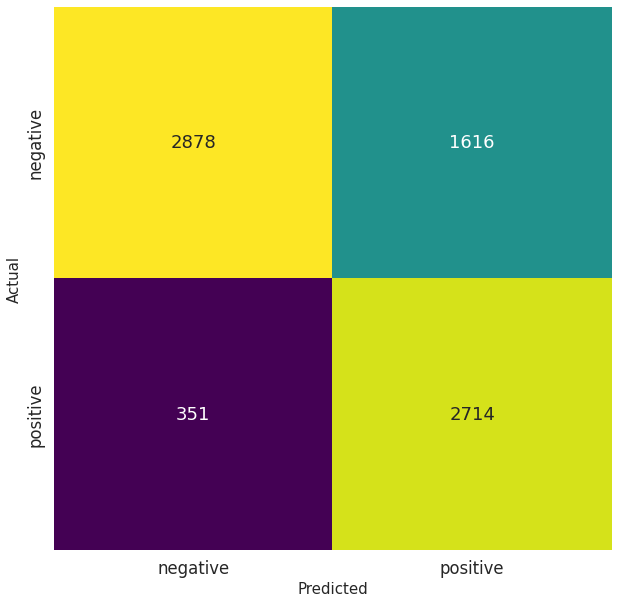

In [ ]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,predict_nb_y)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

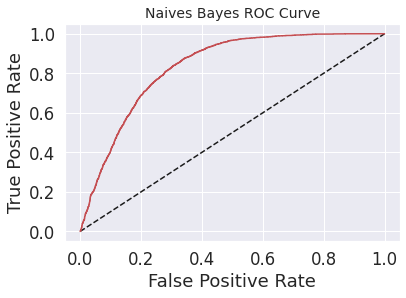

In [ ]:
nb_pred_prob = nb.predict_proba(X_test)[:,1]
false_positive, true_positive, thresholds = roc_curve(y_test, nb_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive, true_positive, label='SVM',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naives Bayes ROC Curve',fontsize=14)
plt.show();

In [ ]:
model = GaussianNB()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.742


The Naives Bayes model did not perform well in comparison to our initial to models. It had a lower mean ROC AUC score as well as having poor recall accuracy when detecting non hit songs and poor precision when detecting hit songs. 

# Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
predictdt_y = decision_tree.predict(X_test)
accuracy_tree_tr = decision_tree.score(X_train,y_train)
accuracy_tree = decision_tree.score(X_test,y_test)
print("Decision Tree accuracy on Training :",accuracy_tree_tr)
print("Decision Tree accuracy on Testing :",accuracy_tree)

Decision Tree accuracy on Training : 0.9998866020298237
Decision Tree accuracy on Testing : 0.7231115226881862


From the initial accuracy test, our Decision tree model is overfitting on the training data.

In [ ]:
decision_tree_report = classification_report(y_test,predictdt_y)
print(decision_tree_report)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4494
           1       0.66      0.66      0.66      3065

    accuracy                           0.72      7559
   macro avg       0.71      0.71      0.71      7559
weighted avg       0.72      0.72      0.72      7559



The classification report shows a weaker performance in comparison to both our SVM & Logistic Regression Models. 

Text(0.5, 58.5, 'Predicted')

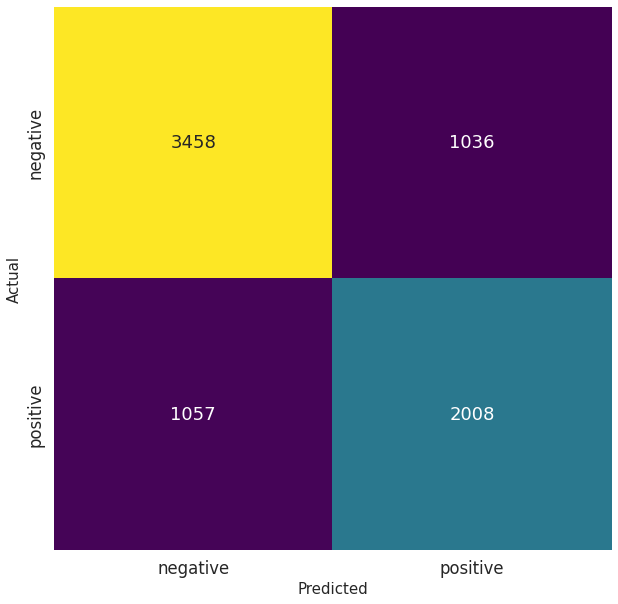

In [ ]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,predictdt_y)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

The Confusion Matrix shows some interesting results. Despite the Decision Tree Model being significantly worse than our previous two models at detecting our hit songs, it detected our non hit songs to higher degree of accuracy.

This might be worth exploring and seeing whether we can improve this model with hyperparameter tuning.

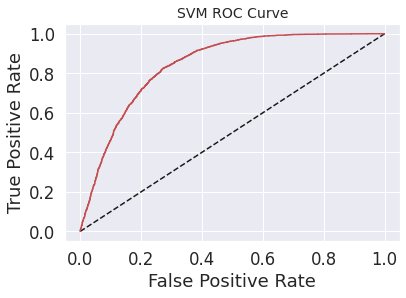

In [ ]:
dt_pred_prob = decision_tree.predict_proba(X_test)[:,1]
false_positive, true_positive, thresholds = roc_curve(y_test, dt_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive, true_positive, label='SVM',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve',fontsize=14)
plt.show();

In [ ]:
model = DecisionTreeClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.729


# Random Forest Classifier

In [17]:
rf = RandomForestClassifier(n_estimators=300 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

accuracy_tree_rf = rf.score(X_train,y_train)
accuracy_tree_test = rf.score(X_test,y_test)
print("Random Forest accuracy on Training :",accuracy_tree_rf)
print("Random Forest accuracy on Testing :",accuracy_tree_test)

Random Forest accuracy on Training : 0.8018937461019447
Random Forest accuracy on Testing : 0.786082815187194


In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      4494
           1       0.71      0.80      0.75      3065

    accuracy                           0.79      7559
   macro avg       0.78      0.79      0.78      7559
weighted avg       0.79      0.79      0.79      7559



Text(0.5, 58.5, 'Predicted')

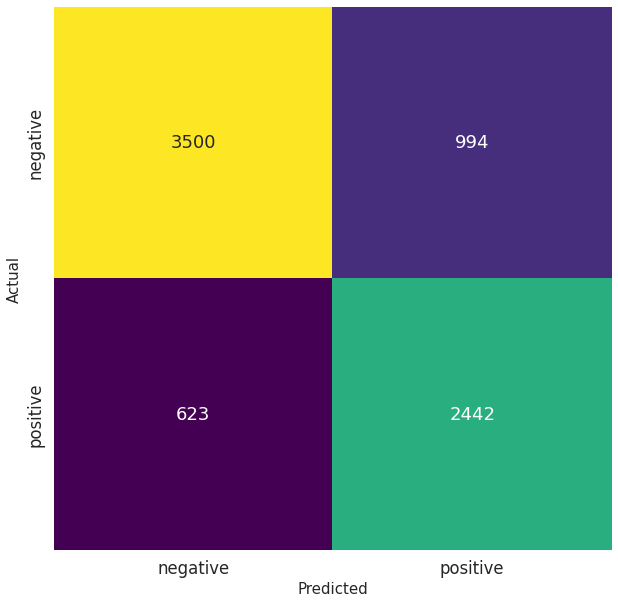

In [ ]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,pred_rf)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

Random Forest Classifier appears to be more accurate than Decision Tree model, and is one of the top performers from all the models, however, it is not detecting hit songs as well as our SVM model. We will see further into the modelling if we can improve the accuracy by tuning the model.

In [ ]:
# increasing the number of estimators to see if this will initially improve accuracy 
rf_second = RandomForestClassifier(n_estimators=600 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf_second.fit(X_train, y_train)
pred_rf = rf_second.predict(X_test)

accuracy_tree_rf = rf_second.score(X_train,y_train)
accuracy_tree_test = rf_second.score(X_test,y_test)
print("Decision Tree accuracy on Training :",accuracy_tree_rf)
print("Decision Tree accuracy on Testing :",accuracy_tree_test)

Decision Tree accuracy on Training : 0.8022339400124737
Decision Tree accuracy on Testing : 0.7863474004497949


The increased number of estimators marginally improved the accuracy. Thus it is worth later checking can we tune the model to further this accuracy.

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      4494
           1       0.71      0.80      0.75      3065

    accuracy                           0.79      7559
   macro avg       0.78      0.79      0.78      7559
weighted avg       0.79      0.79      0.79      7559



The initial increase in the number of n_estimators doesn't seem to improve the performance. We will have to tune the rest of the parameters.

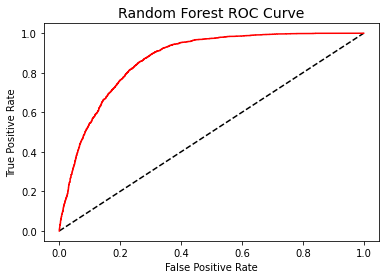

In [18]:
rf_pred_prob = rf.predict_proba(X_test)[:,1]
false_positive, true_positive, thresholds = roc_curve(y_test, rf_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive, true_positive, label='SVM',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=14)
plt.show();

In [ ]:
model = RandomForestClassifier(n_estimators=300 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.793


# Gradient Boosting

In [19]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
gradient_boosting_tr = gradient_boosting.score(X_train,y_train)
gradient_boosting_test = gradient_boosting.score(X_test,y_test)
print("Gradient Boosting Classifier on Training: ", gradient_boosting_tr)
print("Gradient Boosting Classifier", gradient_boosting_test)

Gradient Boosting Classifier on Training:  0.8182230538073368
Gradient Boosting Classifier 0.7990474930546368


In [ ]:
gradient_boosting_pred = gradient_boosting.predict(X_test)
gb_report = classification_report(y_test,gradient_boosting_pred)
print(gb_report)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      4494
           1       0.72      0.82      0.77      3065

    accuracy                           0.80      7559
   macro avg       0.79      0.80      0.80      7559
weighted avg       0.81      0.80      0.80      7559



Text(0.5, 58.5, 'Predicted')

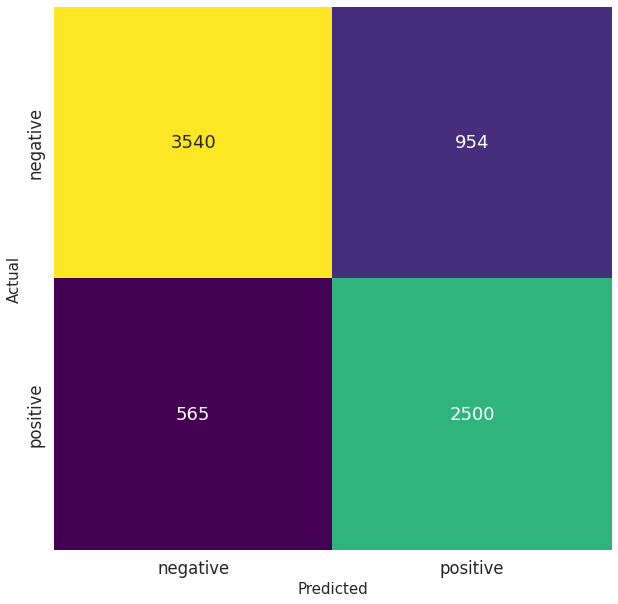

In [ ]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,gradient_boosting_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

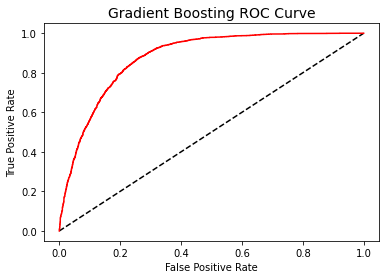

In [21]:
gb_pred_prob = gradient_boosting.predict_proba(X_test)[:,1]
false_positive, true_positive, thresholds = roc_curve(y_test, gb_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive, true_positive, label='SVM',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve',fontsize=14)
plt.show();

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_gradient = cross_val_score(gradient_boosting, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Gradient Boosting: %.3f' % mean(scores_gradient))

Mean ROC AUC for Gradient Boosting: 0.803


It appears that the Gradient Boosting model is the best performing model yet. It has the strongest accuracies as well as the best ROC AUC score. While SVM detected the songs who were hits better, it had the strongest detection for those who weren't hits. This model we will also tune to see can we improve performance.

# Adaboost

In [22]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
ada_acc_tr = adaboost.score(X_train, y_train)
ada_acc_test = adaboost.score(X_test, y_test)
print("AdaBoost Classifier on Training: ", ada_acc_tr)
print("AdaBoost Classifier on Testing: ", ada_acc_test)

AdaBoost Classifier on Training:  0.7942960821001304
AdaBoost Classifier on Testing:  0.7863474004497949


In [ ]:
ada_pred = adaboost.predict(X_test)
ada_report = classification_report(y_test,ada_pred)
print(ada_report)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      4494
           1       0.71      0.80      0.75      3065

    accuracy                           0.79      7559
   macro avg       0.78      0.79      0.78      7559
weighted avg       0.79      0.79      0.79      7559



Text(0.5, 58.5, 'Predicted')

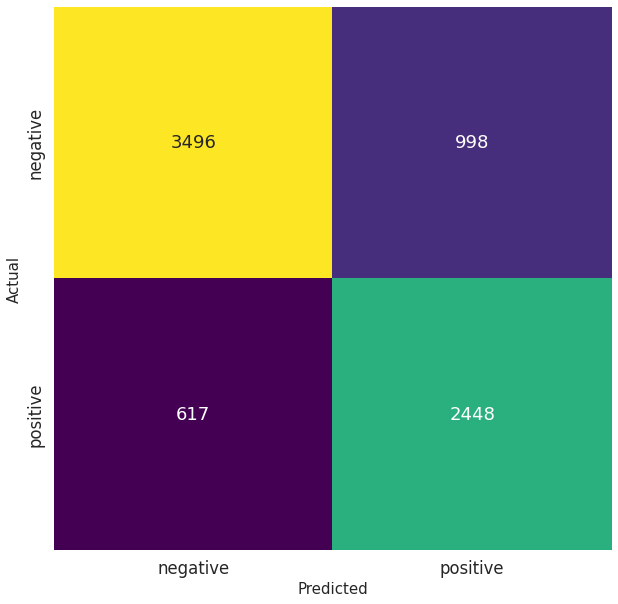

In [ ]:
#create confusion matrix
conf_matrix = confusion_matrix(y_test,ada_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

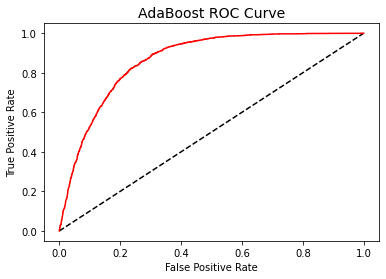

In [24]:
ab_pred_prob = adaboost.predict_proba(X_test)[:,1]
false_positive, true_positive, thresholds = roc_curve(y_test, ab_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive, true_positive, label='SVM',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve',fontsize=14)
plt.show();

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_ada = cross_val_score(adaboost, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for AdaBoost Classifier: %.3f' % mean(scores_ada))

Mean ROC AUC for AdaBoost Classifier: 0.789


SVM, Gradient Boosting & AdaBoost are our best performing models. We will see can we improve the performance of these models by rebalancing the dataset and rerun the models. As well as hyperparamter tuning them.

Checking the most influential features for our Gradient Boosting Model before tuning

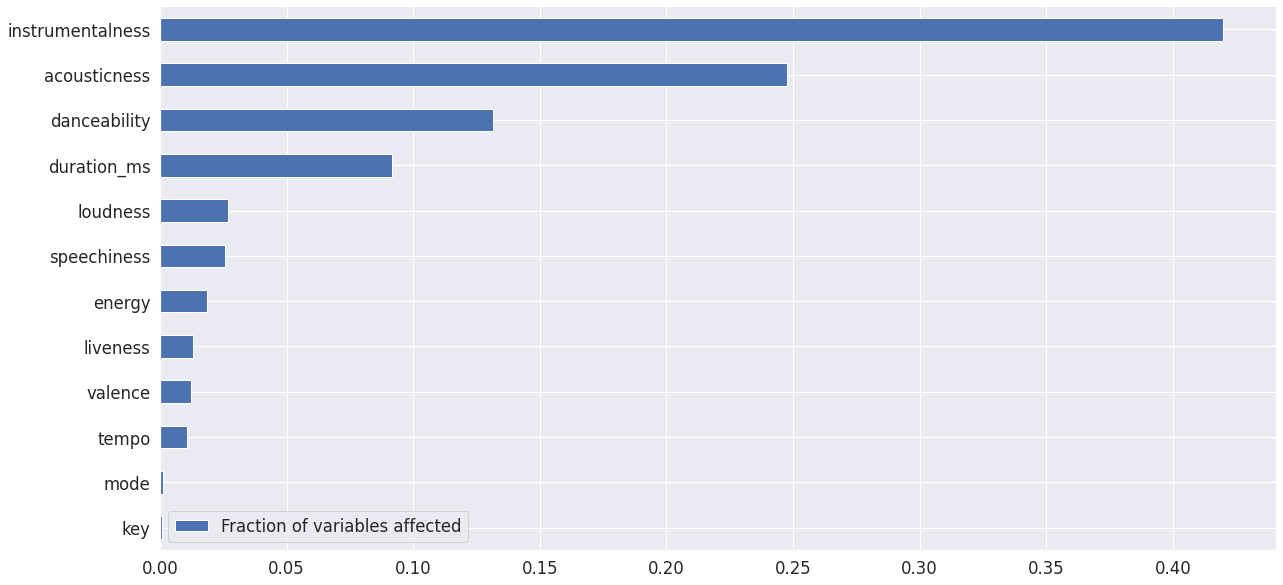

In [ ]:
#FEATURE IMPORTANCE FOR GRADIENT BOOSTING
feat_scores= pd.DataFrame({"Fraction of variables affected" : gradient_boosting.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (20, 10))
sns.despine()

Interesting to note that initially the 'intrumentalness', 'loudness', 'acousticness', & 'danceability' features are thos that have the greatest influence on our Gradient Boosting model. 

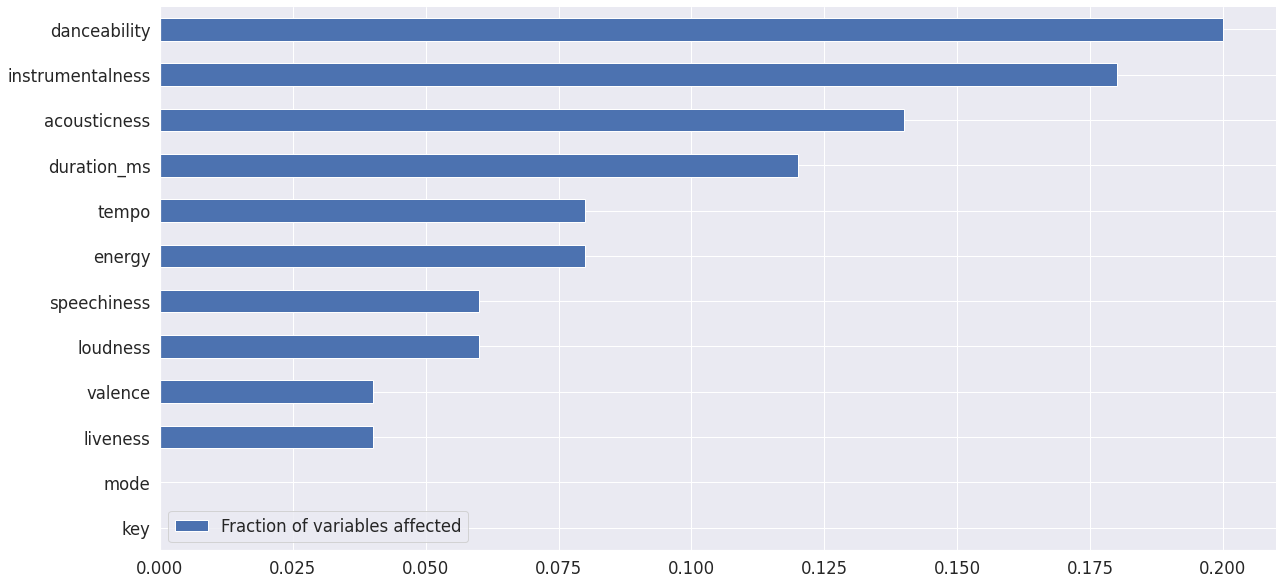

In [ ]:
#FEATURE IMPORTANCE FOR ADABOOST
feat_scores= pd.DataFrame({"Fraction of variables affected" : adaboost.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (20, 10))
sns.despine()

# Deep Learning Models

In [ ]:
import pandas
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(12,1)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=20, batch_size=10)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/20
1764/1764 [==============================] - 4s 2ms/step - loss: 0.4843 - accuracy: 0.7468
Epoch 2/20
1764/1764 [==============================] - 3s 2ms/step - loss: 0.4386 - accuracy: 0.7855
Epoch 3/20
1764/1764 [==============================] - 3s 2ms/step - loss: 0.4317 - accuracy: 0.7871
Epoch 4/20
1764/1764 [==============================] - 3s 2ms/step - loss: 0.4254 - accuracy: 0.7900
Epoch 5/20
1764/1764 [==============================] - 3s 2ms/step - loss: 0.4210 - accuracy: 0.7949
Epoch 6/20
1764/1764 [==============================] - 3s 2ms/step - loss: 0.4171 - accuracy: 0.7988
Epoch 7/20
1764/1764 [==============================] - 3s 2ms/step - loss: 0.4143 - accuracy: 0.7993
Epoch 8/20
1764/1764 [==============================] - 3s 2ms/step - loss: 0.4126 - accuracy: 0.7999
Epoch 9/20
1764/1764 [==============================] - 3s 2ms/step - loss: 0.4110 - accuracy: 0.7997
Epoch 10/20
1764/1764 [==============================] - 3s 2ms/step - loss: 0.409

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12)                0         
                                                                 
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict = hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

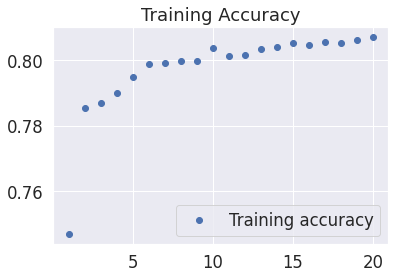

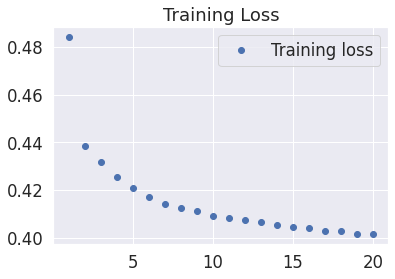

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = hist.history['accuracy']
train_loss = hist.history['loss']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.title('Training Loss')
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(X_test)
y_pred = (predictions > 0.5)
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[3505  989]
 [ 565 2500]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      4494
           1       0.72      0.82      0.76      3065

    accuracy                           0.79      7559
   macro avg       0.79      0.80      0.79      7559
weighted avg       0.80      0.79      0.80      7559



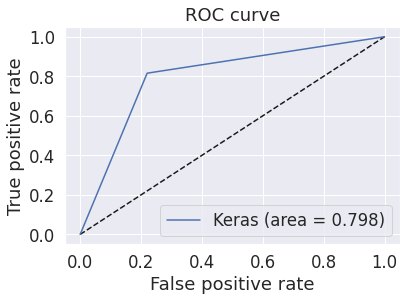

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Addressing Dataset Imbalance

## First Undersampling
To do this we will randomly extract the number of samples from the majority class that is equal to the minority class.

In [25]:
#Balancing the dataset
count_class0,count_class1= df.Hit_Song.value_counts()
print(f'class 0: {count_class0} and class 1: {count_class1}')
#divide by class
data_class_0 = df[df['Hit_Song']==0]
data_class_1 = df[df['Hit_Song']==1]
print(data_class_0.shape,data_class_1.shape)

class 0: 14979 and class 1: 10217
(14979, 13) (10217, 13)


In [26]:
# We will extract 3576 from Class 0
under_sampled_data = pd.concat([data_class_0.sample(count_class1),data_class_1],axis = 0)
under_sampled_data.Hit_Song.value_counts()

0    10217
1    10217
Name: Hit_Song, dtype: int64

In [27]:
# Our dataset is now even
X = under_sampled_data.drop('Hit_Song',axis='columns')
y = under_sampled_data['Hit_Song']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 40,stratify=y) 

The best three performing will now be tested on the undersampled data.

# Under Sampled Gradient Boosting

In [28]:
gradient_boosting_under = GradientBoostingClassifier()
gradient_boosting_under.fit(X_train, y_train)
gradient_boosting_tr = gradient_boosting_under.score(X_train,y_train)
gradient_boosting_test = gradient_boosting_under.score(X_test,y_test)
print("Gradient Boosting Classifier on Training: ", gradient_boosting_tr)
print("Gradient Boosting Classifier on Testing: ", gradient_boosting_test)

Gradient Boosting Classifier on Training:  0.8238131860448857
Gradient Boosting Classifier on Testing:  0.8111237970967216


In [ ]:
gradient_boosting_pred = gradient_boosting_under.predict(X_test)
gb_report = classification_report(y_test,gradient_boosting_pred)
print(gb_report)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      3066
           1       0.77      0.88      0.82      3065

    accuracy                           0.81      6131
   macro avg       0.82      0.81      0.81      6131
weighted avg       0.82      0.81      0.81      6131



Text(0.5, 58.5, 'Predicted')

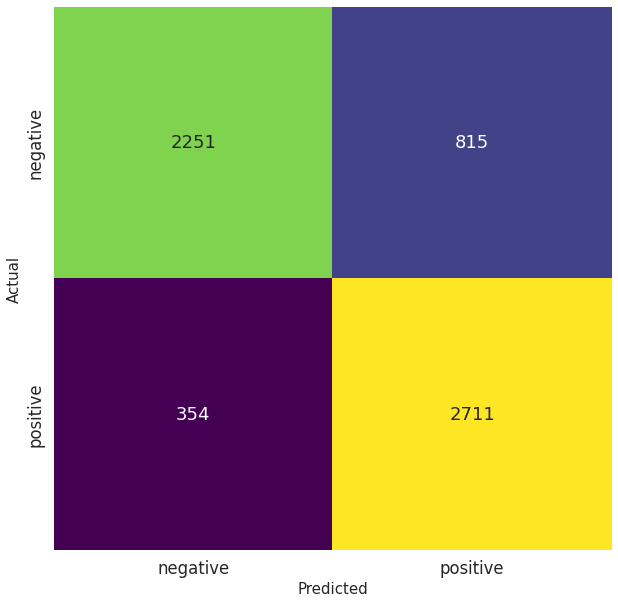

In [ ]:
conf_matrix = confusion_matrix(y_test,gradient_boosting_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

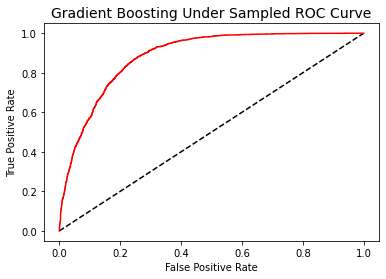

In [29]:
gb_und_pred_prob = gradient_boosting_under.predict_proba(X_test)[:,1]
false_positive, true_positive, thresholds = roc_curve(y_test, gb_und_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive, true_positive, label='SVM',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Under Sampled ROC Curve',fontsize=14)
plt.show();

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_ada = cross_val_score(gradient_boosting_under, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Undersampled Gradient Boosting: %.3f' % mean(scores_ada))

Mean ROC AUC for Undersampled Gradient Boosting: 0.809


From the initial test, while detection of the hit songs improved greatly, the model's ability to detect non-hit songs fell greatly. We will run a few more models and see how they fare.

# Undersampled AdaBoost

In [30]:
adaboost_under = AdaBoostClassifier()
adaboost_under.fit(X_train, y_train)
adaboost_under_tr = adaboost_under.score(X_train,y_train)
adaboost_under_test = adaboost_under.score(X_test,y_test)
print("Adaboost Classifier on Training: ",adaboost_under_tr)
print("Adaboost Classifier on Testing: ", adaboost_under_test)

Adaboost Classifier on Training:  0.8043067887855695
Adaboost Classifier on Testing:  0.7944870331104225


In [ ]:
adaboost_pred = adaboost_under.predict(X_test)
ada_report = classification_report(y_test,adaboost_pred)
print(ada_report)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      3066
           1       0.76      0.86      0.81      3065

    accuracy                           0.80      6131
   macro avg       0.80      0.80      0.80      6131
weighted avg       0.80      0.80      0.80      6131



Text(0.5, 58.5, 'Predicted')

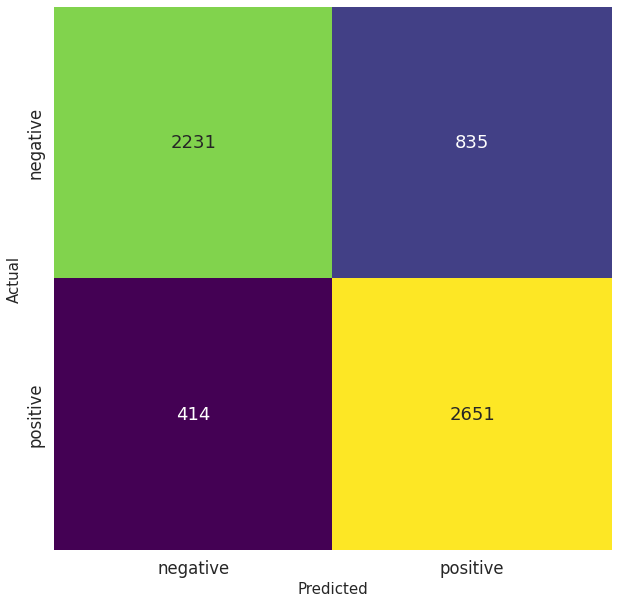

In [ ]:
conf_matrix = confusion_matrix(y_test,adaboost_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

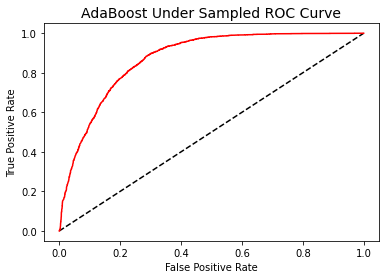

In [32]:
ab_und_pred_prob = adaboost_under.predict_proba(X_test)[:,1]
false_positive, true_positive, thresholds = roc_curve(y_test, ab_und_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(false_positive, true_positive, label='SVM',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Under Sampled ROC Curve',fontsize=14)
plt.show();

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_ada = cross_val_score(adaboost_under, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Undersampled Gradient Boosting: %.3f' % mean(scores_ada))

Mean ROC AUC for Undersampled Gradient Boosting: 0.793


Our AdaBoost model performed similarly to our undersampled Gradeint Boosting model, whereby the detection of hit songs improved, but the detection of non-hit songs decreased. We will now try our SVM model.

# SVM Under Sampled

In [33]:
svm_under = SVC()
svm_under.fit(X_train, y_train)
svm_under_tr = svm_under.score(X_train,y_train)
svm_under_test = svm_under.score(X_test,y_test)
print("SVM Classifier on Training: ",svm_under_tr)
print("SVM Classifier on Testing: ", svm_under_test)

SVM Classifier on Training:  0.8152135915542194
SVM Classifier on Testing:  0.8049257869841787


In [ ]:
svm_under_pred = svm_under.predict(X_test)
svm_under_report = classification_report(y_test,svm_under_pred)
print(svm_under_report)

              precision    recall  f1-score   support

           0       0.88      0.71      0.78      3066
           1       0.75      0.91      0.82      3065

    accuracy                           0.81      6131
   macro avg       0.82      0.81      0.80      6131
weighted avg       0.82      0.81      0.80      6131



Text(0.5, 58.5, 'Predicted')

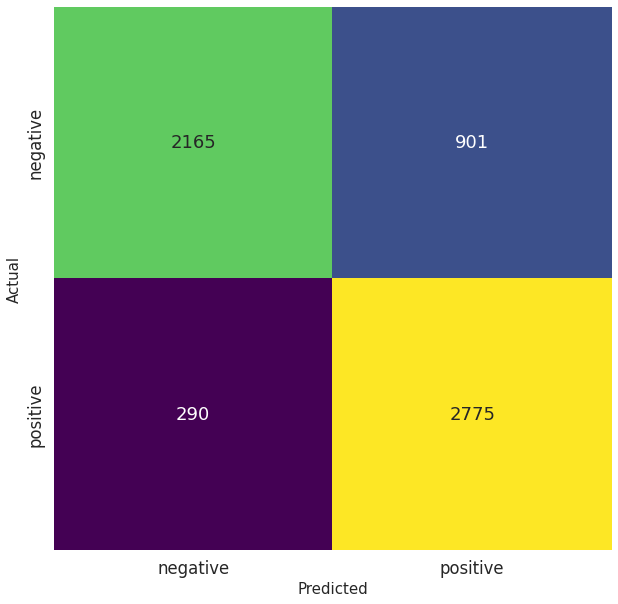

In [ ]:
conf_matrix = confusion_matrix(y_test,svm_under_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_svm = cross_val_score(svm_under, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Undersampled SVM: %.3f' % mean(scores_svm))

Mean ROC AUC for Undersampled Gradient Boosting: 0.801


SVM performed marginally less accurate in comparison to our Gradient Boosting model based on the F1 Scores. We will now see if oversampling the data can improve our accuracies further.

# Undersampled Sequential Neural Network

In [ ]:
model_under = keras.Sequential([
    keras.layers.Flatten(input_shape=(12,1)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [ ]:
model_under.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#hist = 
hist_under = model_under.fit(X_train, y_train, epochs=20, batch_size=10)

test_loss, test_acc = model_under.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/20
1431/1431 [==============================] - 6s 4ms/step - loss: 0.4900 - accuracy: 0.7584
Epoch 2/20
1431/1431 [==============================] - 5s 4ms/step - loss: 0.4494 - accuracy: 0.7915
Epoch 3/20
1431/1431 [==============================] - 5s 4ms/step - loss: 0.4425 - accuracy: 0.7945
Epoch 4/20
1431/1431 [==============================] - 6s 4ms/step - loss: 0.4379 - accuracy: 0.7979
Epoch 5/20
1431/1431 [==============================] - 6s 4ms/step - loss: 0.4352 - accuracy: 0.8006
Epoch 6/20
1431/1431 [==============================] - 5s 3ms/step - loss: 0.4321 - accuracy: 0.8026
Epoch 7/20
1431/1431 [==============================] - 4s 3ms/step - loss: 0.4306 - accuracy: 0.8016
Epoch 8/20
1431/1431 [==============================] - 4s 3ms/step - loss: 0.4281 - accuracy: 0.8027
Epoch 9/20
1431/1431 [==============================] - 5s 4ms/step - loss: 0.4266 - accuracy: 0.8033
Epoch 10/20
1431/1431 [==============================] - 5s 3ms/step - loss: 0.424

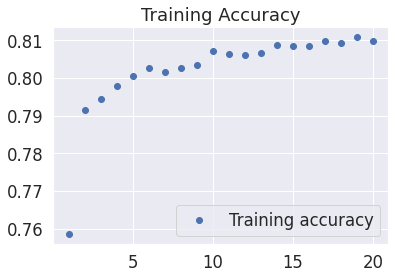

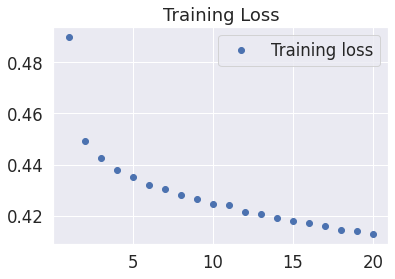

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = hist_under.history['accuracy']
train_loss = hist_under.history['loss']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.title('Training Loss')
plt.legend()

plt.show()

In [ ]:
predictions = model_under.predict(X_test)
y_pred = (predictions > 0.5)
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[2200  866]
 [ 326 2739]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      3066
           1       0.76      0.89      0.82      3065

    accuracy                           0.81      6131
   macro avg       0.82      0.81      0.80      6131
weighted avg       0.82      0.81      0.80      6131



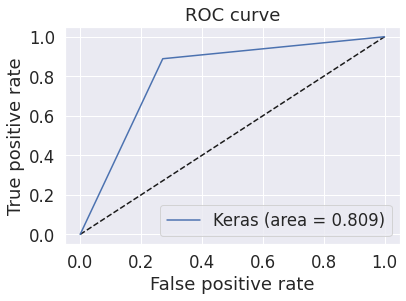

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Oversampling
We will use SMOTE (Synthetic Minority Oversampling Technique).

In [35]:
df2 = df
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Hit_Song
0,-0.309082,0.179967,0.215793,-0.108001,0.678765,-0.363440,-0.958771,-0.566168,-0.885732,-0.181685,-0.747037,-0.152106,1
1,1.602105,-0.208514,-1.473540,-0.523177,0.678765,-0.212421,0.322826,-0.566161,-0.882726,1.723030,0.677032,0.244276,1
2,1.450938,-0.113226,-1.191984,-0.338242,0.678765,-0.408745,-0.482858,-0.565873,-0.194791,1.347295,-0.151848,-0.237540,1
3,0.457552,-0.761917,-1.473540,-1.133930,-1.473263,0.055384,1.016609,-0.566135,-0.626554,-0.252368,-1.535049,-0.050337,1
4,1.019031,-0.153540,0.497348,0.354095,0.678765,-0.507410,0.591387,-0.565776,-0.595886,0.089885,-0.950034,0.073287,1


In [36]:
X = df2.drop(columns = ['Hit_Song'])
y = df2['Hit_Song'].values

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

X_sm,y_sm = smote.fit_resample(X,y)
X_sm = pd.DataFrame(X_sm)
y_sm = pd.Series(y_sm)
y_sm.value_counts()

1    14979
0    14979
dtype: int64

The dataset is now balanced and we have 14979 instances of both hit songs and non hit songs.

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size = 0.3,random_state = 40,stratify=y_sm)

# Gradient Boosting Oversampled

In [39]:
gradient_boosting_smote = GradientBoostingClassifier()
gradient_boosting_smote.fit(X_train, y_train)
gradient_boosting_tr = gradient_boosting_smote.score(X_train,y_train)
gradient_boosting_test = gradient_boosting_smote.score(X_test,y_test)
print("Gradient Boosting Classifier on Training: ", gradient_boosting_tr)
print("Gradient Boosting Classifier on Testing: ", gradient_boosting_test)

Gradient Boosting Classifier on Training:  0.8271340009537435
Gradient Boosting Classifier on Testing:  0.8163106364040944


In [ ]:
gradient_boosting_pred = gradient_boosting_smote.predict(X_test)
gb_report = classification_report(y_test,gradient_boosting_pred)
print(gb_report)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      4494
           1       0.77      0.89      0.83      4494

    accuracy                           0.82      8988
   macro avg       0.82      0.82      0.81      8988
weighted avg       0.82      0.82      0.81      8988



Text(0.5, 58.5, 'Predicted')

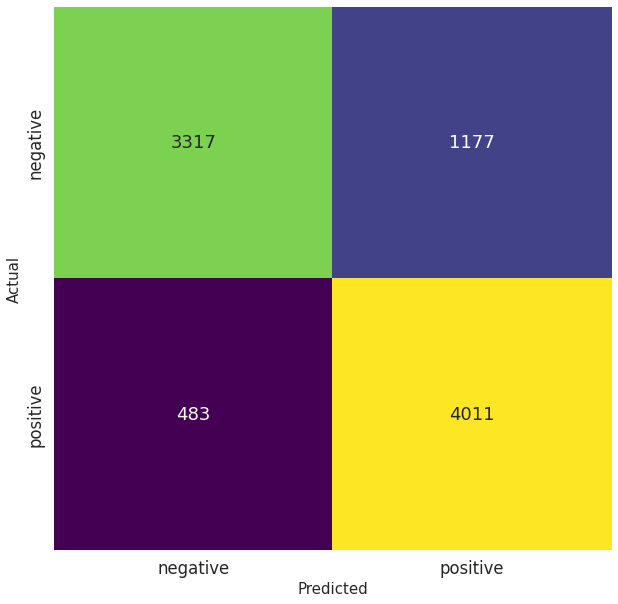

In [ ]:
conf_matrix = confusion_matrix(y_test,gradient_boosting_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

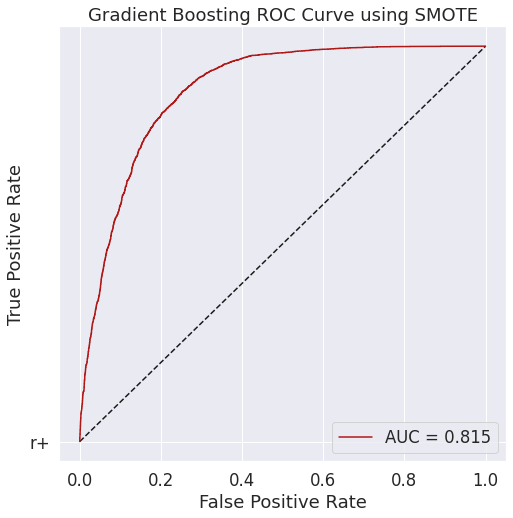

In [ ]:
y_pred_prob = gradient_boosting_smote.predict_proba(X_test)[:,1]
roc = roc_auc_score(y_test, gradient_boosting_pred)
# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.figure(figsize = (8, 8))
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,color = '#b01717', label = 'AUC = %0.3f' % roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve using SMOTE")
plt.legend()
plt.show()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_gr_smote = cross_val_score(gradient_boosting_smote, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Gradeint Boosting Classifier on SMOTE Data: %.3f' % mean(scores_gr_smote))

Mean ROC AUC for Gradeint Boosting Classifier on SMOTE Data: 0.815


The use of SMOTE on the dataset seemed to have improved our Gradient Boosting model. We will now see how the rest performed.

# AdaBoost on Oversampled Data

In [40]:
adaboost_smote = AdaBoostClassifier()
adaboost_smote.fit(X_train, y_train)
adaboost_smote_tr = adaboost_smote.score(X_train,y_train)
adaboost_smote_test = adaboost_smote.score(X_test,y_test)
print("AdaBoost Classifier on Training: ",adaboost_smote_tr)
print("AdaBoost Classifier on Testing: ", adaboost_smote_test)

AdaBoost Classifier on Training:  0.8061039580352886
AdaBoost Classifier on Testing:  0.7999554962171784


In [41]:
adaboost_smote_pred = adaboost_smote.predict(X_test)
ada__smote_report = classification_report(y_test,adaboost_smote_pred)
print(ada__smote_report)

              precision    recall  f1-score   support

           0       0.85      0.73      0.79      4494
           1       0.76      0.87      0.81      4494

    accuracy                           0.80      8988
   macro avg       0.81      0.80      0.80      8988
weighted avg       0.81      0.80      0.80      8988



Text(0.5, 58.5, 'Predicted')

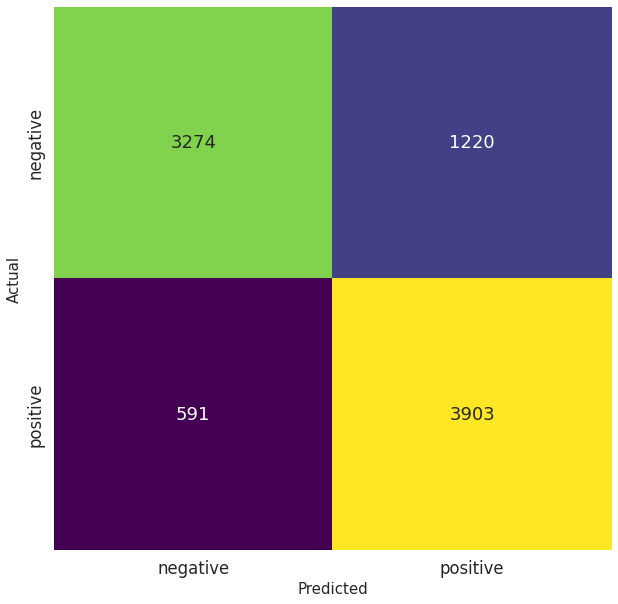

In [ ]:
conf_matrix = confusion_matrix(y_test,adaboost_smote_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

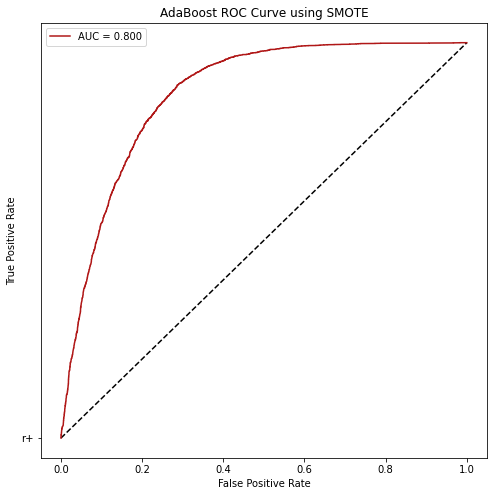

In [42]:
y_pred_prob = adaboost_smote.predict_proba(X_test)[:,1]
roc = roc_auc_score(y_test, adaboost_smote_pred)
# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.figure(figsize = (8, 8))
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,color = '#b01717', label = 'AUC = %0.3f' % roc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AdaBoost ROC Curve using SMOTE")
plt.legend()
plt.show()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_ada = cross_val_score(adaboost_smote, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for AdaBoost Classifier on SMOTE Data: %.3f' % mean(scores_ada))

Mean ROC AUC for AdaBoost Classifier on SMOTE Data: 0.801


# SVM SMOTE

In [43]:
svm_smote = SVC()
svm_smote.fit(X_train, y_train)
svm_smote_tr = svm_smote.score(X_train,y_train)
svm_smote_test = svm_smote.score(X_test,y_test)
print("SVC SMOTE on Training: ",svm_smote_tr)
print("SVC SMOTE on Testing: ", svm_smote_test)

SVC SMOTE on Training:  0.8198855507868383
SVC SMOTE on Testing:  0.812082777036048


In [44]:
svm_smote_pred = svm_smote.predict(X_test)
svm_smote_report = classification_report(y_test,svm_smote_pred)
print(svm_smote_report)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      4494
           1       0.76      0.91      0.83      4494

    accuracy                           0.81      8988
   macro avg       0.83      0.81      0.81      8988
weighted avg       0.83      0.81      0.81      8988



Text(0.5, 58.5, 'Predicted')

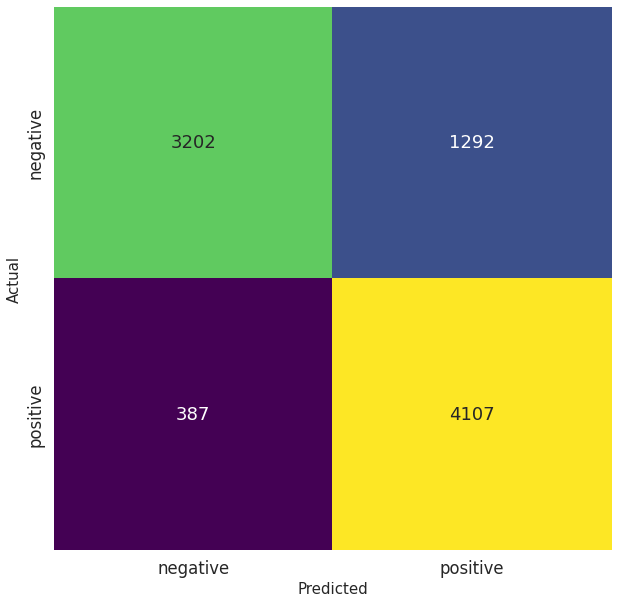

In [ ]:
conf_matrix = confusion_matrix(y_test,svm_smote_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_svm = cross_val_score(svm_smote, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Support Vector Classifier on SMOTE Data: %.3f' % mean(scores_svm))

Mean ROC AUC for Support Vector Classifier on SMOTE Data: 0.810


The Gradient Boosting Model on the SMOTE dataset appears to be the best performing model that we've tested yet. We will hyperparameter tune these three the models and see can we further improve the accuracies. 

The detection of hit songs has improved as a result of our more balanced dataset, however the detection of our non-hit songs decreased. We will see will our tuned models address this.

In [ ]:
model_over = keras.Sequential([
    keras.layers.Flatten(input_shape=(12,1)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [ ]:
model_over.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist_over = model_over.fit(X_train, y_train, epochs=20, batch_size=10)

test_loss, test_acc = model_under.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4687 - accuracy: 0.7776
Epoch 2/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4318 - accuracy: 0.8032
Epoch 3/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4214 - accuracy: 0.8071
Epoch 4/20
2097/2097 [==============================] - 3s 2ms/step - loss: 0.4147 - accuracy: 0.8103
Epoch 5/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4111 - accuracy: 0.8130
Epoch 6/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4079 - accuracy: 0.8143
Epoch 7/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4060 - accuracy: 0.8148
Epoch 8/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4040 - accuracy: 0.8175
Epoch 9/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.4025 - accuracy: 0.8168
Epoch 10/20
2097/2097 [==============================] - 4s 2ms/step - loss: 0.401

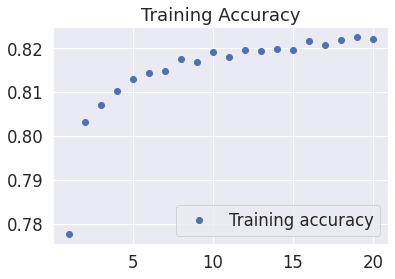

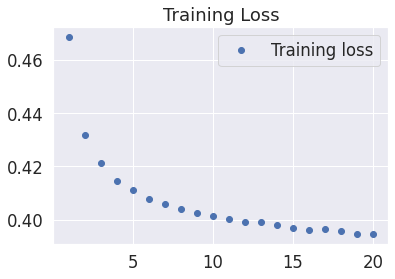

In [ ]:
train_accuracy = hist_over.history['accuracy']
train_loss = hist_over.history['loss']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.title('Training Loss')
plt.legend()

plt.show()

In [ ]:
predictions = model_over.predict(X_test)
y_pred = (predictions > 0.5)
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[3401 1093]
 [ 591 3903]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      4494
           1       0.78      0.87      0.82      4494

    accuracy                           0.81      8988
   macro avg       0.82      0.81      0.81      8988
weighted avg       0.82      0.81      0.81      8988



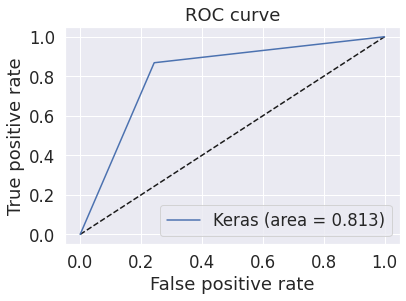

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Hyperparameter Tuning Gradient Boosting Model

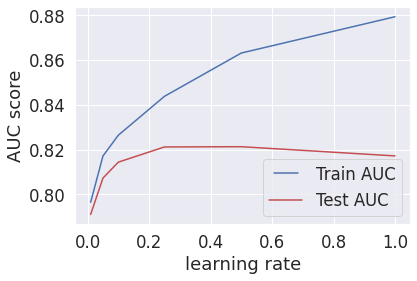

In [ ]:
# first checking the learning rates for our model
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

The above graph shows that the learning rate for this model is optimal around 0.25. After this point the test rate declines and the training data begins to overfit.

In [ ]:
# Number of estimators for the model
n_estimators = [1, 2, 4, 8, 20, 32, 64, 100, 200, 300, 500, 700, 900]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
min_samples_splits = np.linspace(0.05, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   model = GradientBoostingClassifier(min_samples_split=min_samples_split)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [ ]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   model = GradientBoostingClassifier(max_features=max_feature)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max Features')
plt.show()

In [ ]:
gb_smote_tune_final = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.25, loss='deviance', max_depth=5,
                                            max_features=10, max_leaf_nodes=None,
                                            min_samples_leaf=0.075,
                                            min_samples_split=0.05, min_weight_fraction_leaf=0.0,
                                            n_estimators=600, random_state=None,
                                            subsample=1.0, verbose=0, warm_start=False)
gb_smote_tune_final.fit(X_train, y_train)
gradient_boosting_tr_tune_f = gb_smote_tune_final.score(X_train,y_train)
gradient_boosting_test_tune_f = gb_smote_tune_final.score(X_test,y_test)
print("Gradient Boosting Classifier on Training: ", gradient_boosting_tr_tune_f)
print("Gradient Boosting Classifier on Testing: ", gradient_boosting_test_tune_f)

Gradient Boosting Classifier on Training:  0.8762994754411063
Gradient Boosting Classifier on Testing:  0.829105473965287


In [ ]:
gradient_boosting_pred_tune = gb_smote_tune_final.predict(X_test)
gb_report = classification_report(y_test,gradient_boosting_pred_tune)
print(gb_report)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      4494
           1       0.80      0.88      0.84      4494

    accuracy                           0.83      8988
   macro avg       0.83      0.83      0.83      8988
weighted avg       0.83      0.83      0.83      8988



Text(0.5, 58.5, 'Predicted')

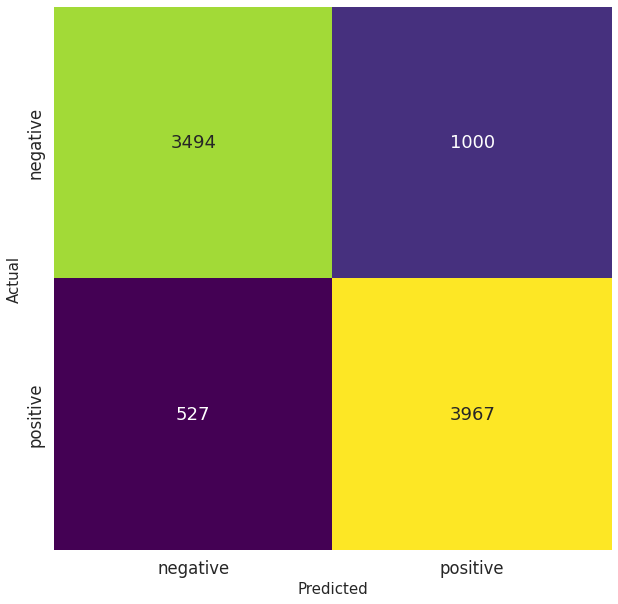

In [ ]:
conf_matrix = confusion_matrix(y_test,gradient_boosting_pred_tune)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_svm = cross_val_score(gb_smote_tune_final, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Hyperparameter tuned Gradient Boosting model on SMOTE Data: %.3f' % mean(scores_svm))

Mean ROC AUC for Hyperparameter tuned Gradient Boosting model on SMOTE Data: 0.827


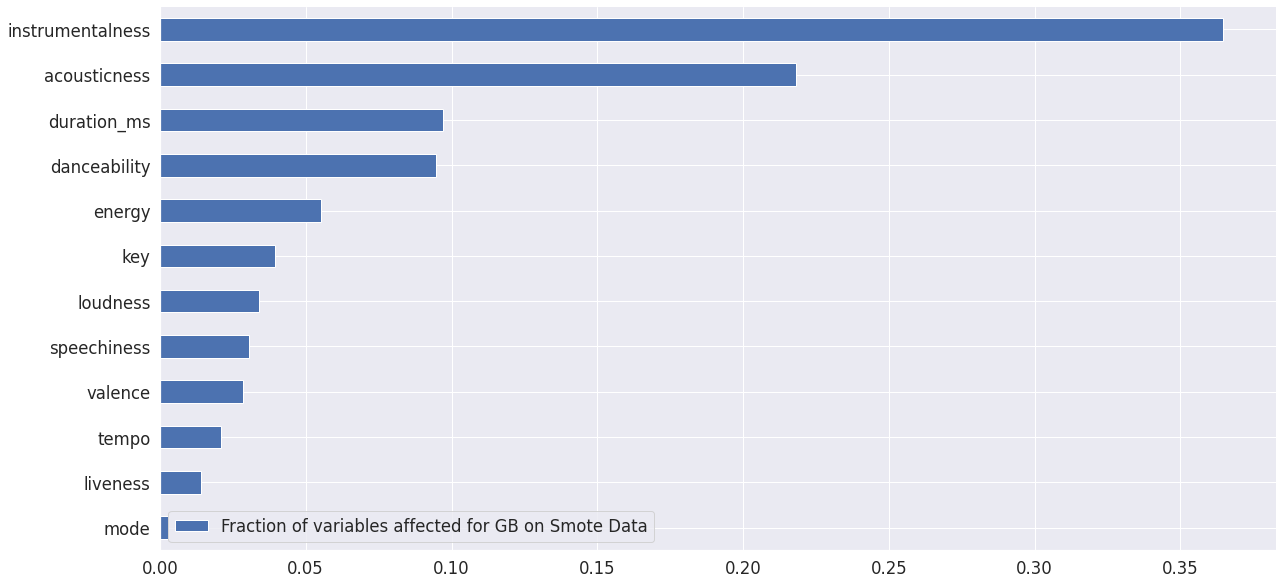

In [ ]:
#FEATURE IMPORTANCE FOR GRADIENT BOOSTING ON SMOTE DATASET
feat_scores= pd.DataFrame({"Fraction of variables affected for GB on Smote Data" : gb_smote_tune_final.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected for GB on Smote Data")
feat_scores.plot(kind = "barh", figsize = (20, 10))
sns.despine()

# Hyperparameter Tuning SVM

In [ ]:
#Hyperparameter tuning SVM
#WARNING: This piece of code takes a long time to run
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
svm_smote_tuned = SVC(C=10, gamma = 0.1, kernel='rbf')
svm_smote_tuned.fit(X_train, y_train)
svm_smote_tr_tuned = svm_smote_tuned.score(X_train,y_train)
svm_smote_test_tuned = svm_smote_tuned.score(X_test,y_test)
print("Hyperparameter tuned SVC SMOTE on Training: ",svm_smote_tr_tuned)
print("Hyperparameter tuned SVC SMOTE on Testing: ", svm_smote_test_tuned)

Hyperparameter tuned SVC SMOTE on Training:  0.8450643776824034
Hyperparameter tuned SVC SMOTE on Testing:  0.8140854472630173


In [ ]:
svm_smote_tuned_pred = svm_smote_tuned.predict(X_test)
svm_smote_report_tuned = classification_report(y_test,svm_smote_tuned_pred)
print(svm_smote_report_tuned)

              precision    recall  f1-score   support

           0       0.89      0.72      0.79      4494
           1       0.76      0.91      0.83      4494

    accuracy                           0.81      8988
   macro avg       0.83      0.81      0.81      8988
weighted avg       0.83      0.81      0.81      8988



In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_svm_tuned = cross_val_score(svm_smote_tuned, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Support Vector Classifier on SMOTE Data: %.3f' % mean(scores_svm_tuned))

Mean ROC AUC for Support Vector Classifier on SMOTE Data: 0.817


The tuned Gradient Boosting model using SMOTE Dataset is the best performing model so far. As one last effort to try improve, we try stacking the models so as to try improve accuracy

In [ ]:
from sklearn.ensemble import StackingClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('GB', GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                          learning_rate=0.25, loss='deviance', max_depth=5,
                                          max_features=10, max_leaf_nodes=None,
                                          min_samples_leaf=0.075,
                                          min_samples_split=0.05, min_weight_fraction_leaf=0.0,
                                          n_estimators=600, random_state=None,
                                          subsample=1.0, verbose=0, warm_start=False)))
models.append(('SVM', SVC(C=10, gamma = 0.1, kernel='rbf')))
models.append(('AB', AdaBoostClassifier()))
model1 = LogisticRegression()
#define the stacking ensemble
model = StackingClassifier(estimators=models, final_estimator=model1, cv=5)
stacked = model.fit(X_train, y_train)
stacked_tr_tuned = stacked.score(X_train,y_train)
stacked_test_tuned = stacked.score(X_test,y_test)
print("Stacked Models on Training: ",stacked_tr_tuned)
print("Stacked Models on Testing: ", stacked_test_tuned)

Stacked Models on Training:  0.8750596089651884
Stacked Models on Testing:  0.833555852247441


In [ ]:
stacked_tune = stacked.predict(X_test)
stacked_report = classification_report(y_test,stacked_tune)
print(stacked_report)

              precision    recall  f1-score   support

           0       0.88      0.78      0.82      4494
           1       0.80      0.89      0.84      4494

    accuracy                           0.83      8988
   macro avg       0.84      0.83      0.83      8988
weighted avg       0.84      0.83      0.83      8988



Text(0.5, 58.5, 'Predicted')

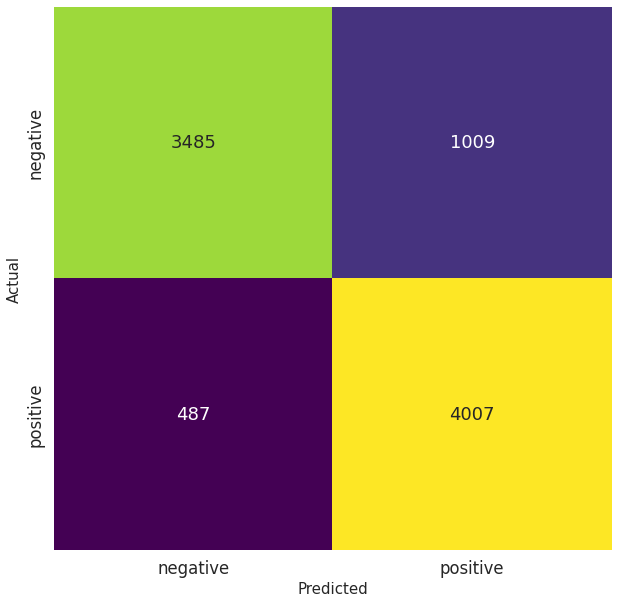

In [ ]:
conf_matrix = confusion_matrix(y_test,stacked_tune)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive'],
                              index=['negative','positive'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='viridis',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=15)
plt.xlabel('Predicted',size=15)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_stacked = cross_val_score(stacked, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean ROC AUC for Stacked models on SMOTE Data: %.3f' % mean(scores_stacked))

Mean ROC AUC for Stacked models on SMOTE Data: 0.831


Due to the added complexity from the stacked model for only a marginal improvement in performance, the hyperparameter tuned Gradient Boosting model on SMOTE data is the best performing model.